**Multiple Linear Regression**

In the original version of linear regression, we had a single feature x, and we're able to predict y, the target variable. The model was f=w*x+b.

Now, we not only have the size of the house as a feature with which to try to predict the price, but also the number of bedrooms, the number of floors and the age of the home in years. This would give a lot more information with which to predict the price.

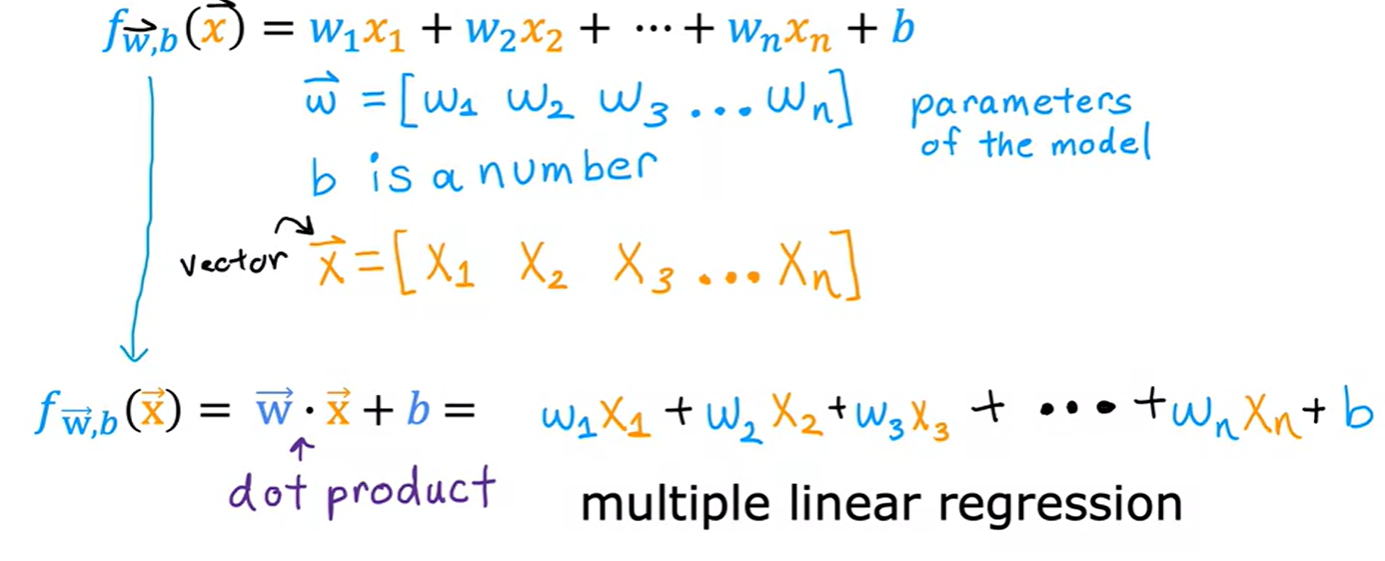

**Vectorization**

When we're implementing a learning algorithm, using vectorization will both make our code shorter and also make it run much more efficiently. Learning how to write vectorized code will allow us to take advantage of modern numerical linear algebra libraries, as well as GPU hardware that stands for graphics processing unit.  This is because NumPy makes better use of available data parallelism in the underlying hardware. GPU's and modern CPU's implement Single Instruction, Multiple Data (SIMD) pipelines allowing multiple operations to be issued in parallel. This is critical in Machine Learning where the data sets are often very large.

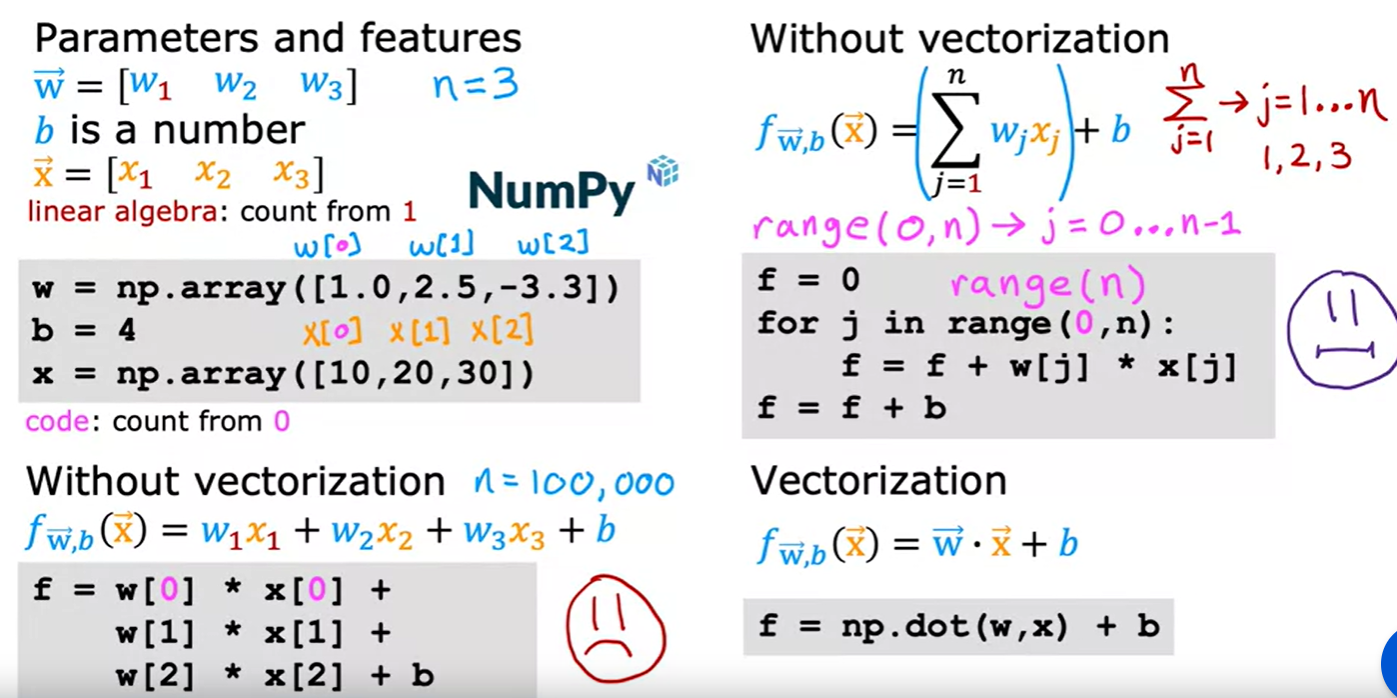


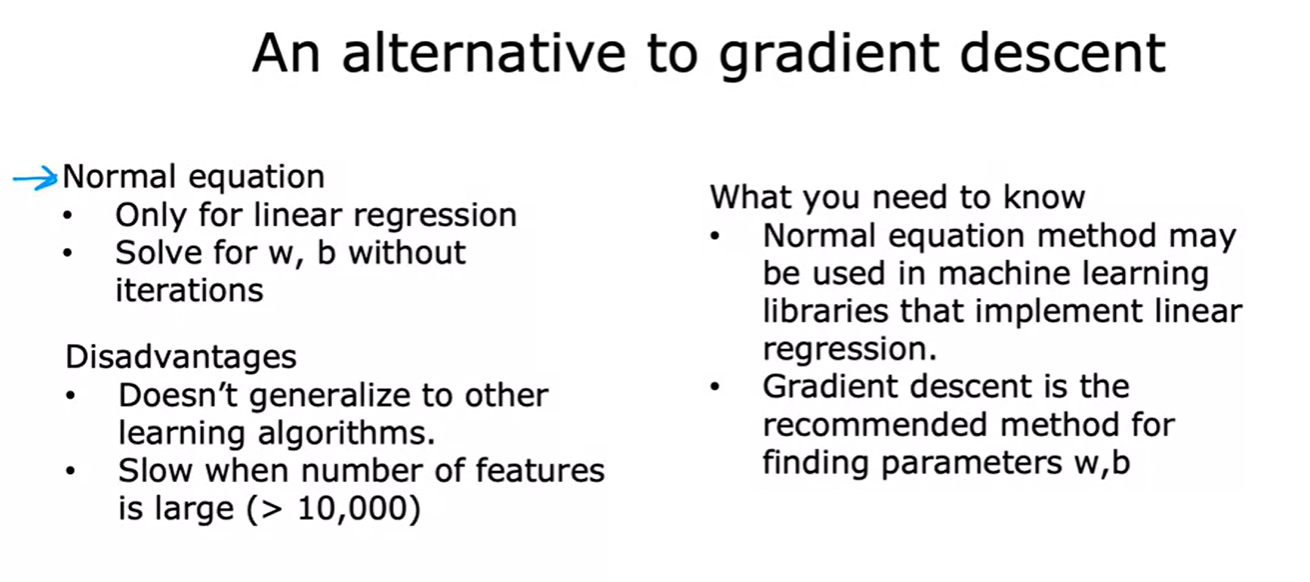

**Feature scaling**

It is a technique that enables gradient descent to run much faster.

As a concrete example, let's predict the price of a house using two features x1 the size of the house and x2 the number of bedrooms. Let's say that x1 typically ranges from 300 to 2000 square feet. And x2 in the data set ranges from 0 to 5 bedrooms.

When we have different features that take on very different ranges of values, it can cause gradient descent to run slowly. It will create a contour plot where the horizontal axis has a much narrower range, say between zero and one, whereas the vertical axis takes on much larger values, say between 10 and 100. The contours form ovals or ellipses and they're short on one side and longer on the other, but re scaling the different features helps so they all take on comparable range of values. 

The key point is that the re scaled x1 and x2 are both now taking comparable ranges of values to each other. And if we run gradient descent on a cost function to find on this, re scaled x1 and x2, then the contours will look more like circles and less tall and skinny. And gradient descent can find a much more direct path to the global minimum.


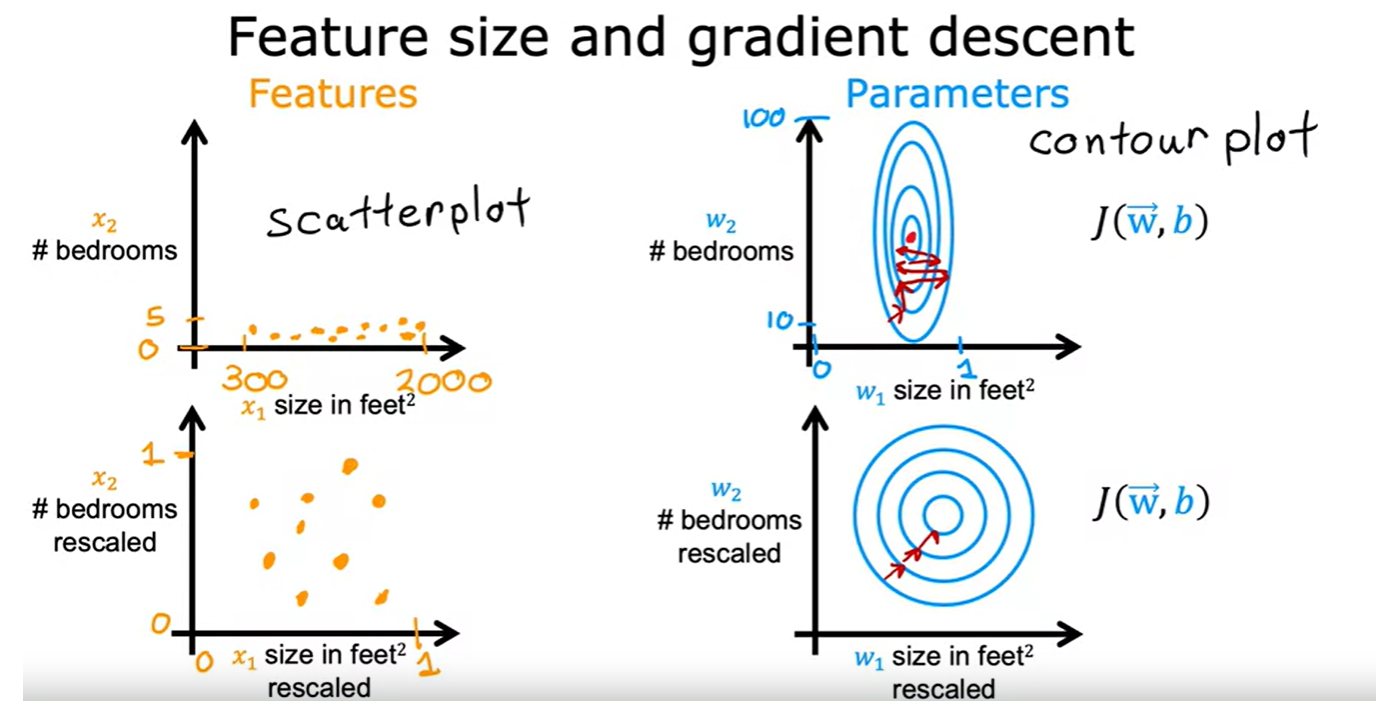

**Feature scaling methods:**

Implementation Note: When normalizing the features, it is important to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters from the model, we often want to predict the prices of houses we have not seen before. Given a new x value (living room area and number of bed- rooms), we must first normalize x using the mean and standard deviation that we had previously computed from the training set.

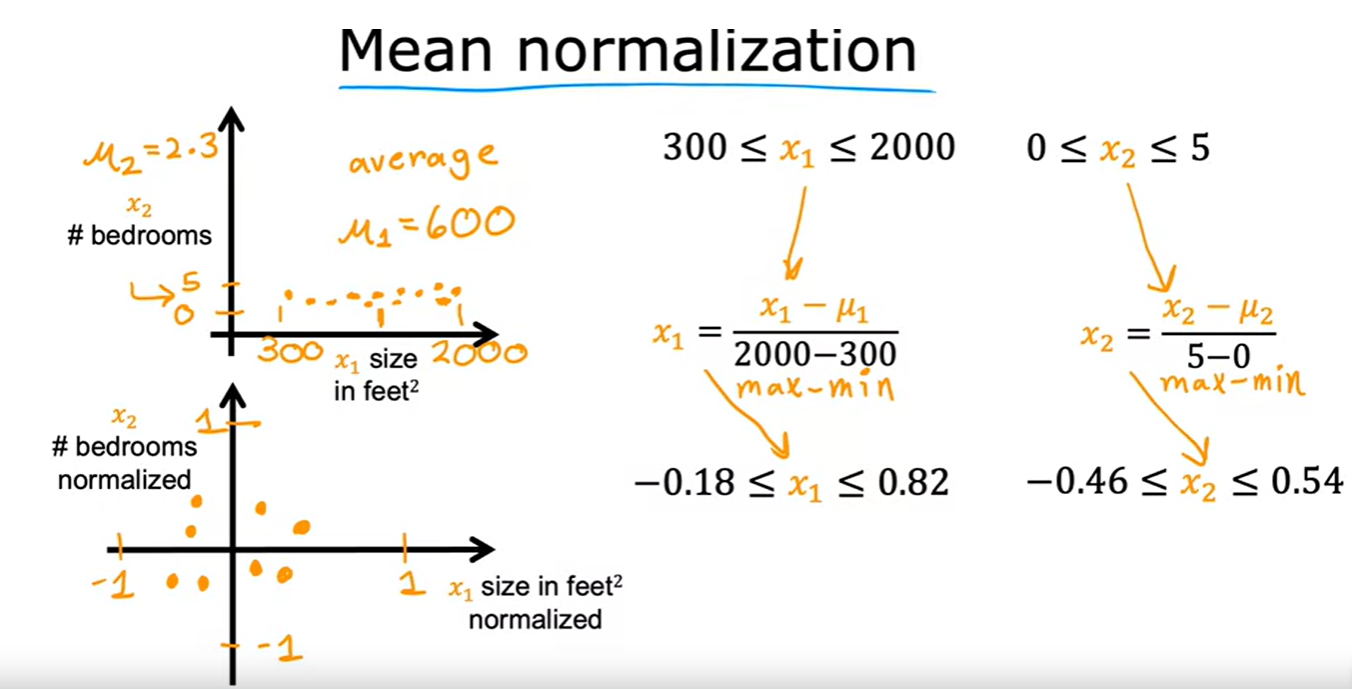



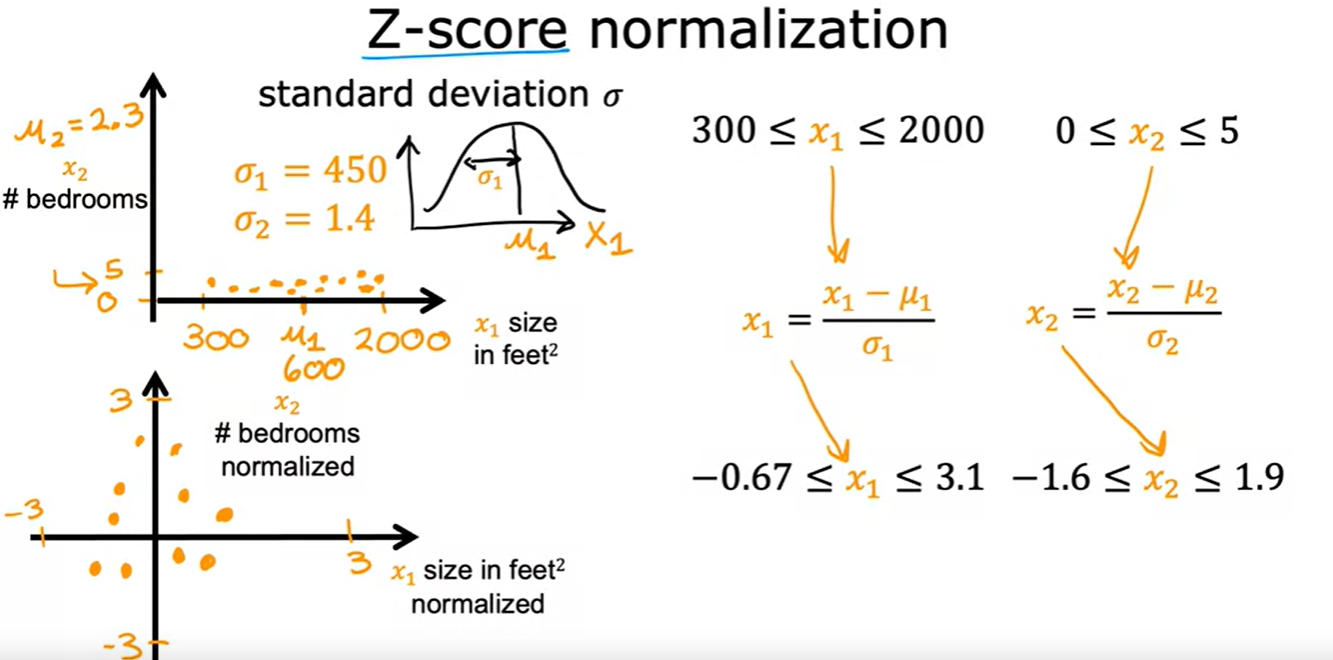

In [1]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)

**Checking gradient descent for convergence**

Plot the cost function J, which is calculated on the training set at each iteration of gradient descent. Remember that each iteration means after each simultaneous update of the parameters w and b. In this plot, the horizontal axis is the number of iterations of gradient descent that we've run so far. If gradient descent is working properly, then the cost J should decrease after every single iteration. This curve is called a learning curve.

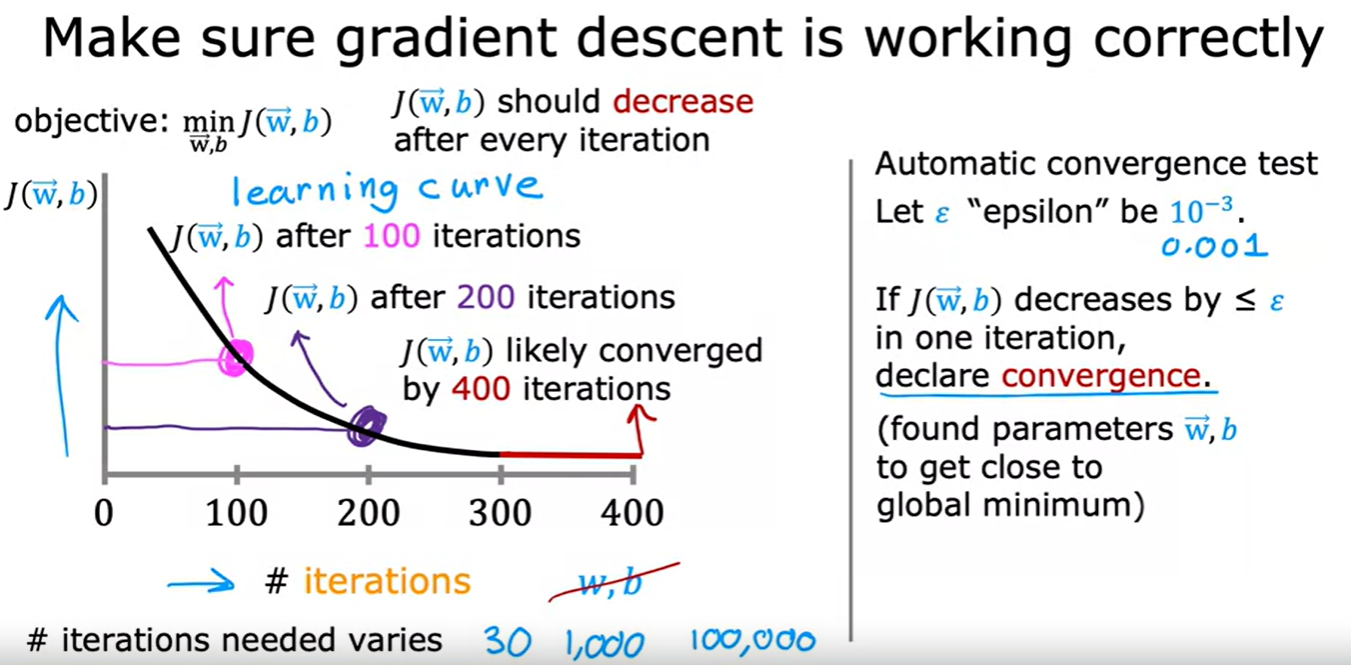

Creating a new feature is an example of what's called feature engineering. We use our knowledge or intuition about the problem to design new features usually by transforming or combining the original features of the problem in order to make it easier for the learning algorithm to make accurate predictions. 


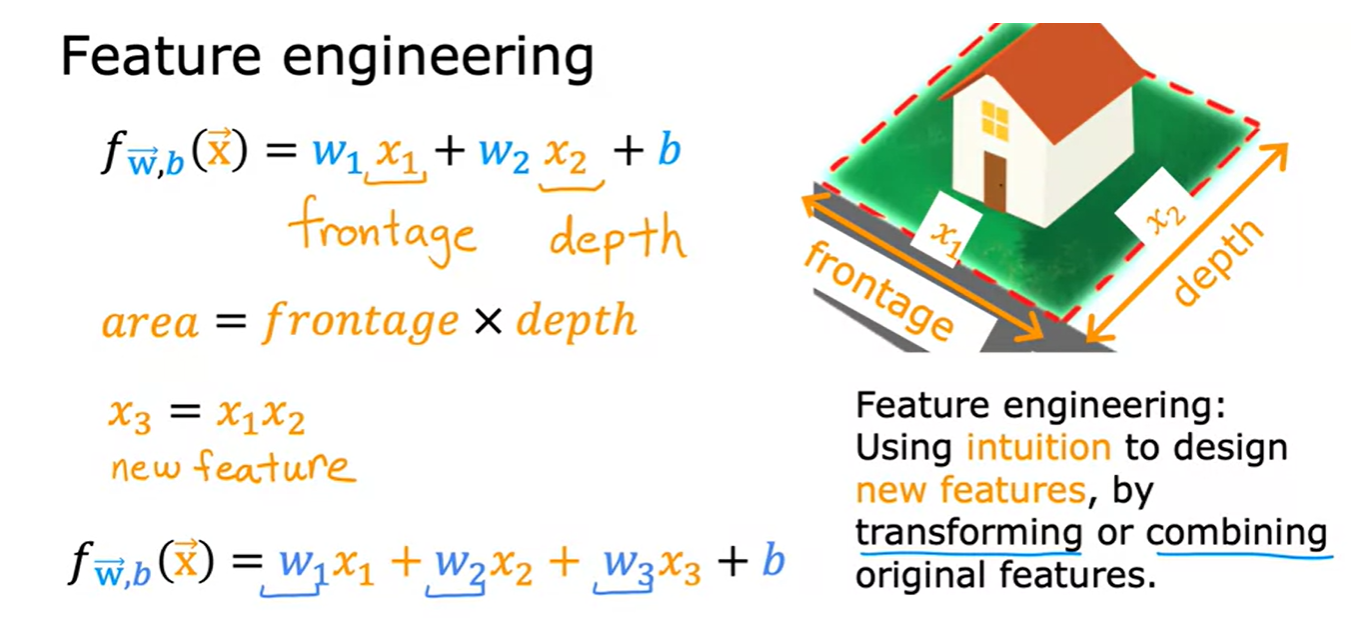

In [6]:
#Linear Regression using Scikit Learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [103]:
#Ames Housing dataset
train_data = pd.read_csv(r"data\train.csv")
test_data =  pd.read_csv(r"data\test.csv")

#drop the Id column as it is not an useful feature
train_data = train_data.drop('Id', axis=1)
test_data = test_data.drop('Id', axis=1)


In [104]:
print(set(train_data.dtypes.to_list()))

{dtype('int64'), dtype('float64'), dtype('O')}


In [108]:
X_train_numeric, y_train = train_data.iloc[:, :79].select_dtypes(include=['int64']), train_data.iloc[:,79]
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train_numeric)


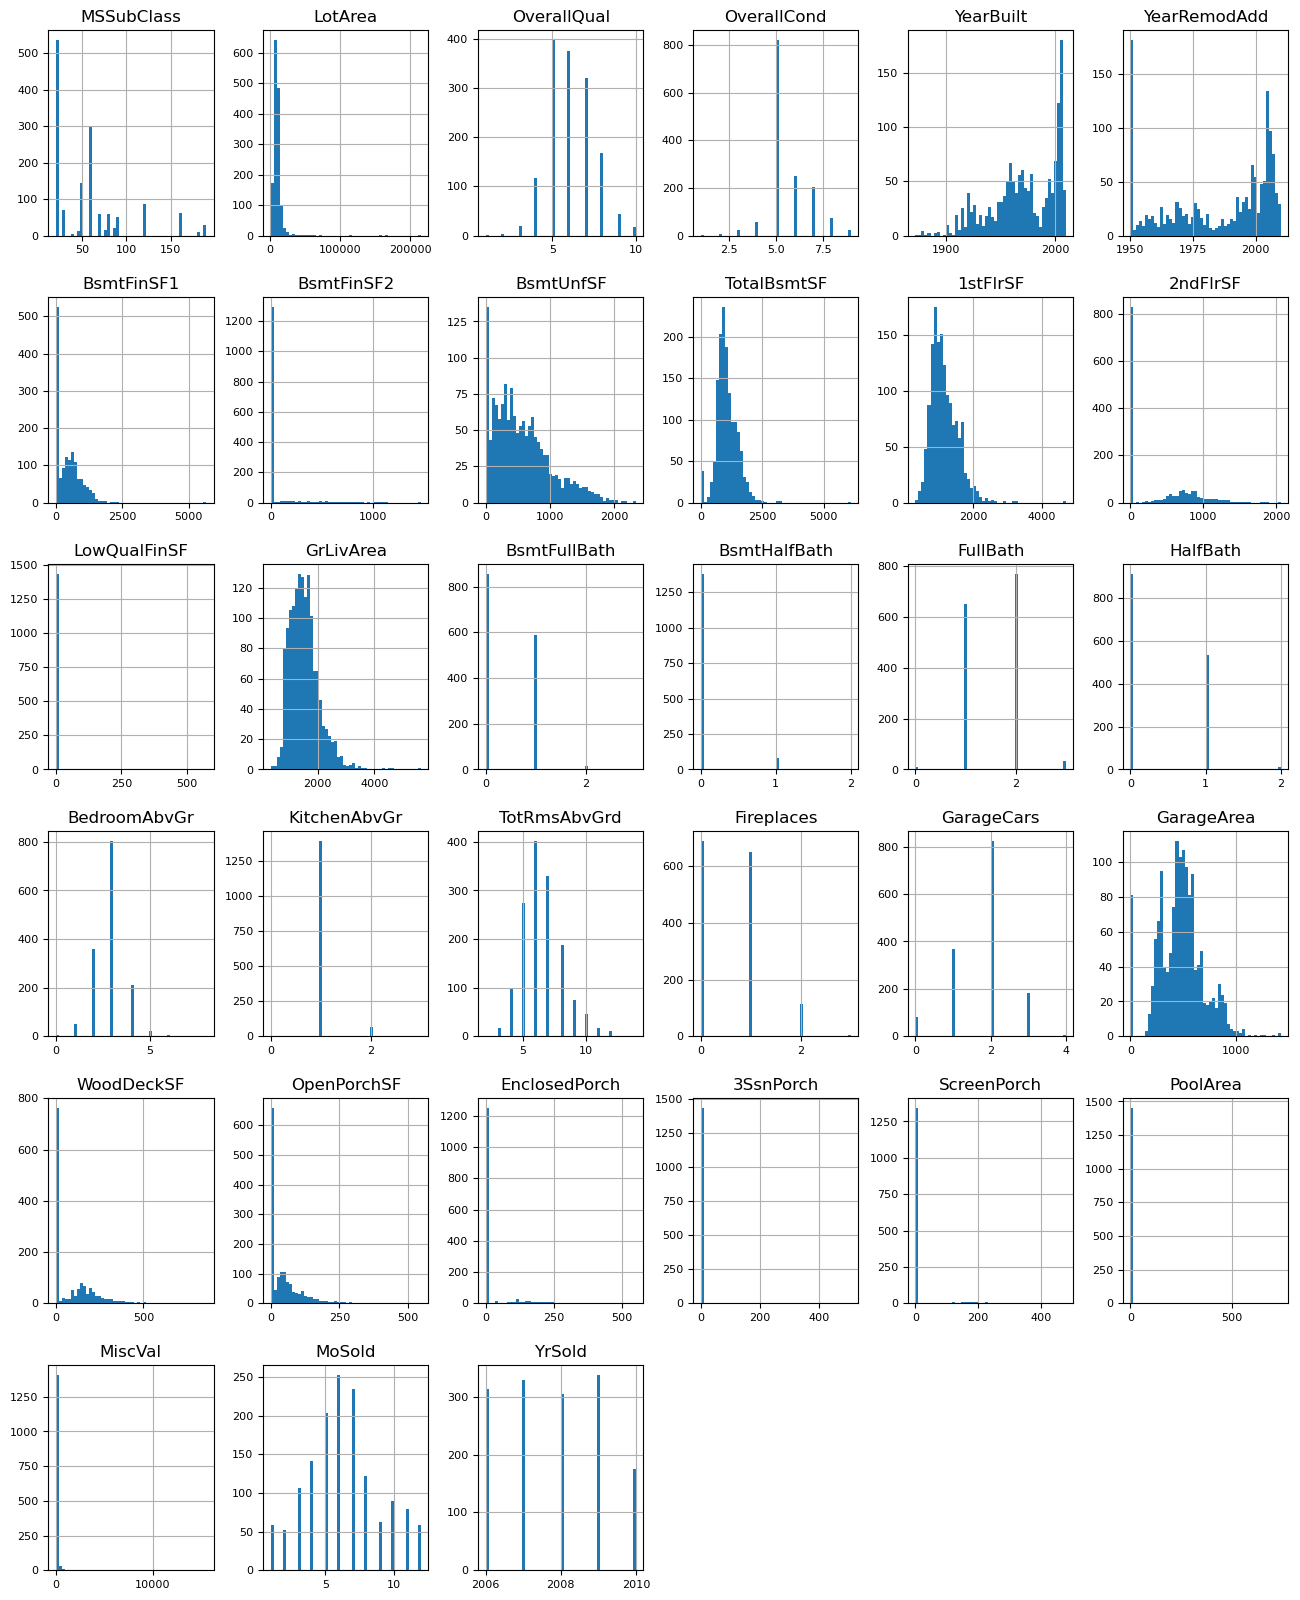

In [109]:
#plot distribution of all numerical variables
X_train_numeric.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [110]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

number of iterations completed: 18, number of weight updates: 26281.0


In [111]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [-6641.15592308  3401.69086605 25097.38726351  5112.82499802
 10234.4700007   3195.05751632  4020.81180309  -853.52273999
    69.20301063  3936.06675509  8293.36157288 10078.52057976
  -322.82199983 14443.88098014  4111.57849147   825.84788189
  2742.02000718  -681.91941441 -7872.34019571 -2501.93232737
  8626.45798609  2081.77604373  8121.46487872  -146.50276905
  3927.42378897  -464.99227146   232.84023401   280.87730308
  3063.46129902 -2718.04000497  -220.79980557  -170.57413404
  -953.82772271], b:[180904.57255035]


In [112]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[227827.25154474 199399.57064252 222630.75519174 194479.70898512]
Target values 
0    208500
1    181500
2    223500
3    140000
Name: SalePrice, dtype: int64


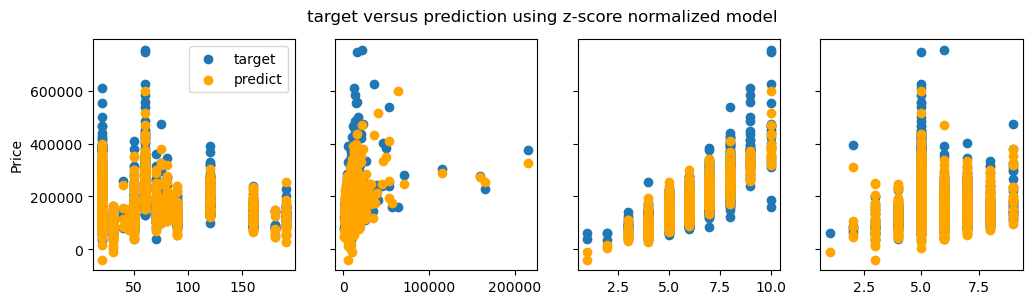

In [123]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train_numeric.iloc[:,i],y_train, label = 'target')
    #ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train_numeric.iloc[:,i],y_pred,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()